<a href="https://colab.research.google.com/github/Laxmikanth-88/Databasefiles/blob/main/NetflixBusinesscasestudy_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyze Netflix content data and extract actionable insights to guide decisions on what content Netflix should produce and how to expand in different countries.**



In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
netflix_df=pd.read_csv("netflix.csv")
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


No duplicate records in the provided Netflix dataset

**Knowing the basic Details of the Dataset**  
Observations on the shape of data, data types of all the attributes
, missing value detection

In [204]:
netflix_df_shape= netflix_df.shape
netflix_df_info=netflix_df.info()
netflix_df_nullcount=netflix_df.isnull().sum()
netflix_df_shape,netflix_df_info,netflix_df_nullcount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


((8807, 12),
 None,
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64)

<u>**Observations:**</u>  


1.  Dataset contains of 8807 records with 12 attributes
2. Among the 12 attributes, the majority are categorical (object data type), with the exception of release_year, which is numerical (int64 data type).
3.  The majority of the missing values are found in the  director,cast and country attributes  




<u>**Missing Value Detection**</u>
<Ol>
<li>director: 2,634 missing values</li>
<li>cast: 825 missing values</li>
<li>country: 831 missing values</li>
<li>date_added: 10 missing values</li>
<li>rating: 4 missing values</li>
<li>duration: 3 missing values</li>
</ol>

**statistical summary of release_year,type and rating**

In [205]:
netflix_metrix_numerical=netflix_df.describe()
netflix_metrix_categorical=netflix_df[['type','rating']].describe(include=['object'])
display(netflix_metrix_numerical,netflix_metrix_categorical)

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


,type,rating
count,8807,8803
unique,2,17
top,Movie,TV-MA
freq,6131,3207


<u>**Observations:**</u>  


1.   The release_year column is fully populated no missing values.The average release is around 2014, while the median release is 2017,Quartile1 is 2013 indicating that 75 % of the content in the Netflix is released in between 2013 to 2021
2. The type column is fully populated with no missing values. Among its two unique values, Movies account for 6,131 out of 8,807 entries, representing approximately 70% of the dataset. This indicates a stronger emphasis on movie content.
3. The rating column is not fully populated, with 4 missing values. Of its 17 unique ratings, TV-MA appears in 3,207 entries, making up roughly 36% of the dataset. This suggests a significant focus on content targeted at mature audiences.



<u>**Data type Conversions**</u>

Converting type and rating columns to category as these two columns might be use frequently in the analysis

Converting date_added column to datetime to extract year and month if required for analysis

In [206]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].str.strip())
netflix_df['type'] = netflix_df['type'].astype('category')
netflix_df['rating'] = netflix_df['rating'].astype('category')

Data Cleaning and Data splitting

In [207]:
netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')
netflix_df['director'] = netflix_df['director'].fillna('Unknown')


netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month


netflix_df['duration'] = netflix_df['duration'].fillna('0')
netflix_df[['duration_int', 'duration_type']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')
netflix_df['duration_int'] = netflix_df['duration_int'].astype('float')

In [208]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
count,8807,8807,8807,8807,8807,8807,8797,8807.000000,8803,8807,8807,8807,8797.000000,8797.000000,8804.000000,8804
unique,8807,2,8807,4529,7693,749,NaN,NaN,17,221,514,8775,NaN,NaN,NaN,3
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN,NaN,NaN,min
freq,1,6131,1,2634,825,2818,NaN,NaN,3207,1793,362,4,NaN,NaN,NaN,6128
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-17 05:59:08.436967168,2014.180198,NaN,NaN,NaN,NaN,2018.871888,6.654996,69.846888,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN,2008.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN,NaN,2018.000000,4.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-02 00:00:00,2017.000000,NaN,NaN,NaN,NaN,2019.000000,7.000000,88.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-19 00:00:00,2019.000000,NaN,NaN,NaN,NaN,2020.000000,10.000000,106.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,2021.000000,12.000000,312.000000,NaN


<u>**Exploding multivalue columns**</u>

In [209]:
netflix_df_cast = netflix_df[netflix_df['cast'] != 'Unknown'].copy()
netflix_df_cast['cast'] = netflix_df_cast['cast'].str.split(', ')
netflix_df_cast = netflix_df_cast.explode('cast')
netflix_df_cast

netflix_df_dir = netflix_df[netflix_df['director'] != 'Unknown'].copy()
netflix_df_dir['director'] = netflix_df_dir['director'].str.split(', ')
netflix_df_dir = netflix_df_dir.explode('director')
netflix_df_dir

netflix_df_genre = netflix_df[netflix_df['listed_in'] != 'Unknown'].copy()
netflix_df_genre['listed_in'] = netflix_df_genre['listed_in'].str.split(', ')
netflix_df_genre = netflix_df_genre.explode('listed_in')
netflix_df_genre

netflix_df_country = netflix_df[netflix_df['country'] != 'Unknown'].copy()
netflix_df_country['country'] = netflix_df_country['country'].str.split(', ')
netflix_df_country = netflix_df_country.explode('country')
netflix_df_country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Seasons
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,125.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,125.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",Jordan,2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0,96.0,min
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,158.0,min
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,88.0,min


<u>**Non-Graphical Analysis:**</u>
**Value counts and unique attributes analysis for multivalue columns**

In [210]:
netflix_df_cast_stats=netflix_df_cast[['cast']].describe(include=['object'])
netflix_df_director_stats=netflix_df_dir[['director']].describe(include=['object'])
netflix_df_country_stats=netflix_df_country[['country']].describe(include=['object'])
netflix_df_listed_stats=netflix_df_genre[['listed_in']].describe(include=['object'])

netflix_df_cast_top10=netflix_df_cast[['cast']].value_counts().head(10)
netflix_df_director_top10=netflix_df_dir[['director']].value_counts().head(10)
netflix_df_country_top10=netflix_df_country[['country']].value_counts().head(10)
netflix_df_listed_top10=netflix_df_genre[['listed_in']].value_counts().head(10)

(netflix_df_cast_stats,netflix_df_director_stats,netflix_df_country_stats,netflix_df_listed_stats,netflix_df_cast_top10,
netflix_df_director_top10,netflix_df_country_top10,netflix_df_listed_top10)

(               cast
 count         64126
 unique        36439
 top     Anupam Kher
 freq             43,
              director
 count            6978
 unique           4993
 top     Rajiv Chilaka
 freq               22,
               country
 count           10014
 unique            127
 top     United States
 freq             3689,
                    listed_in
 count                  19323
 unique                    42
 top     International Movies
 freq                    2752,
 cast            
 Anupam Kher         43
 Shah Rukh Khan      35
 Julie Tejwani       33
 Takahiro Sakurai    32
 Naseeruddin Shah    32
 Rupa Bhimani        31
 Akshay Kumar        30
 Om Puri             30
 Yuki Kaji           29
 Paresh Rawal        28
 Name: count, dtype: int64,
 director           
 Rajiv Chilaka          22
 Jan Suter              21
 Raúl Campos            19
 Marcus Raboy           16
 Suhas Kadav            16
 Jay Karas              15
 Cathy Garcia-Molina    13
 Youssef Chahin

<u>**Observations**</u>



1. Anupam Kher (43) has the highest number of appearances, followed by Shah Rukh Khan (35) and Julie Tejwani (33).

2. The list includes prominent Indian actors (Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Akshay Kumar, Om Puri, Paresh Rawal), suggesting a strong Indian representation in the dataset.

3. There's a significant global representation in both content creators (actors, directors)

4. India (1046) is the second-highest, which aligns with the strong presence of Indian actors and directors.
5. Genre diversity is high, with both mainstream (dramas, comedies) and niche (documentaries, children's content) well-represented.

<u>**Top 10 Actors, Directors, Countries, and Genres Involved in Netflix Content**</u>

Most Frequent Cast Members
The dataset highlights several prolific actors, with Anupam Kher leading the list, appearing in 43 titles. Other frequently featured actors include:

Shah Rukh Khan – 35 appearances

Julie Tejwani – 33 appearances

Takahiro Sakurai – 32 appearances

Naseeruddin Shah – 32 appearances

Rupa Bhimani – 31 appearances

Akshay Kumar – 30 appearances

Om Puri – 30 appearances

Yuki Kaji – 29 appearances

Paresh Rawal – 28 appearances

Most Active Directors
The most prolific director is Rajiv Chilaka, with 22 titles to his name. Other notable directors include:

Jan Suter – 21 titles

Raúl Campos – 19 titles

Marcus Raboy and Suhas Kadav – 16 titles each

Jay Karas – 15 titles

Cathy Garcia-Molina – 13 titles

Youssef Chahine, Martin Scorsese, and Jay Chapman – 12 titles each

Top Countries by Content Production
The United States dominates content production with 3,689 titles, followed by:

India – 1,046 titles

United Kingdom – 804 titles

Canada – 445 titles

France – 393 titles

Japan – 318 titles

Spain – 232 titles

South Korea – 231 titles

Germany – 226 titles

Mexico – 169 titles

Most Common Genres / Categories
The most popular content categories include:

International Movies – 2,752 titles

Dramas – 2,427 titles

Comedies – 1,674 titles

International TV Shows – 1,351 titles

Documentaries – 869 titles

Action & Adventure – 859 titles

TV Dramas – 763 titles

Independent Movies – 756 titles

Children & Family Movies – 641 titles

Romantic Movies – 616 titles

<u>**Non-Graphical Analysis:**</u>
**Value counts and unique attributes analysis**

In [211]:
# @title
value_counts_type = netflix_df['type'].value_counts()
value_counts_rating = netflix_df['rating'].value_counts()
value_counts_release_year = netflix_df['release_year'].value_counts().head(10)  # Top 10 release years


unique_type = netflix_df['type'].unique()
unique_rating = netflix_df['rating'].unique()
unique_release_year = netflix_df['release_year'].unique()

value_counts_type, value_counts_rating, value_counts_release_year, unique_type,unique_rating,unique_release_year

(type
 Movie      6131
 TV Show    2676
 Name: count, dtype: int64,
 rating
 TV-MA       3207
 TV-14       2160
 TV-PG        863
 R            799
 PG-13        490
 TV-Y7        334
 TV-Y         307
 PG           287
 TV-G         220
 NR            80
 G             41
 TV-Y7-FV       6
 NC-17          3
 UR             3
 66 min         1
 84 min         1
 74 min         1
 Name: count, dtype: int64,
 release_year
 2018    1147
 2017    1032
 2019    1030
 2020     953
 2016     902
 2021     592
 2015     560
 2014     352
 2013     288
 2012     237
 Name: count, dtype: int64,
 ['Movie', 'TV Show']
 Categories (2, object): ['Movie', 'TV Show'],
 ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., '66 min', 'NR', NaN, 'TV-Y7-FV', 'UR']
 Length: 18
 Categories (17, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
 array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
        1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 

<u>**Observations**</u>


1. The platform predominantly offers movies, almost twice as many as TV Shows.
2
2. The most common ratings are 'TV-MA' and 'TV-14', indicating a focus on mature and teen audiences.
3. Most of the content was released in the years 2018, 2017, and 2019, showing a strong focus on recent content.
4. Released year of the content is varying from 1943 to 2020


<u>**Graphical analysis**</u>

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

<u>**Univarite analysis**</u>

Bar plot for Rating

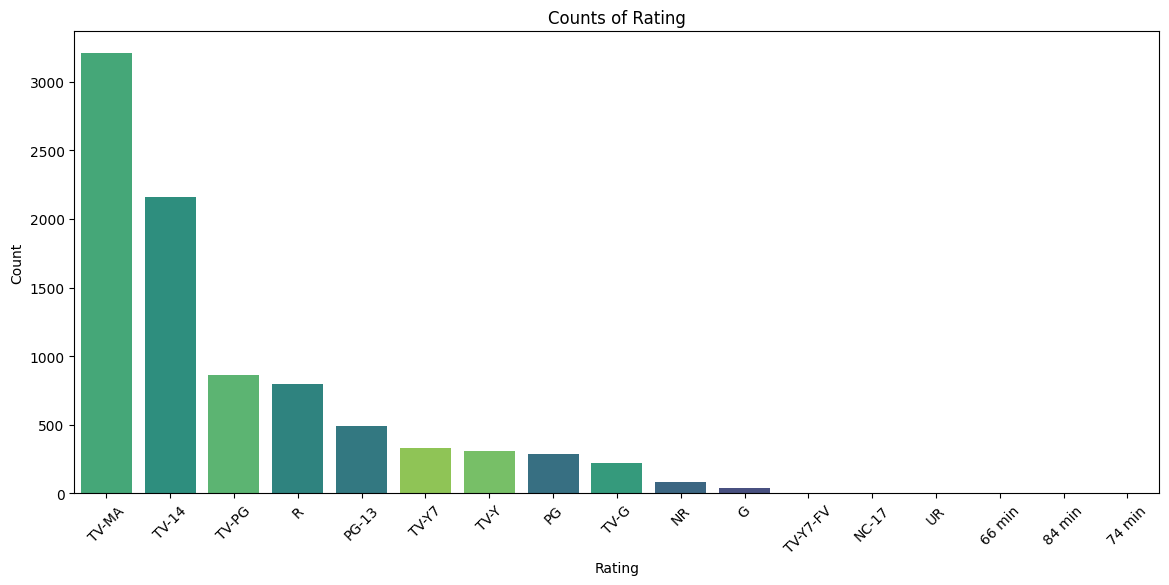

In [213]:
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='viridis',hue='rating',legend=False)
plt.title('Counts of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<u>**Observation:**</u>
1. The majority of the content is rated “TV-MA” followed by “TV-14”, indicating a focus on mature audiences and teenagers.

Top 10 Most Productive Directors

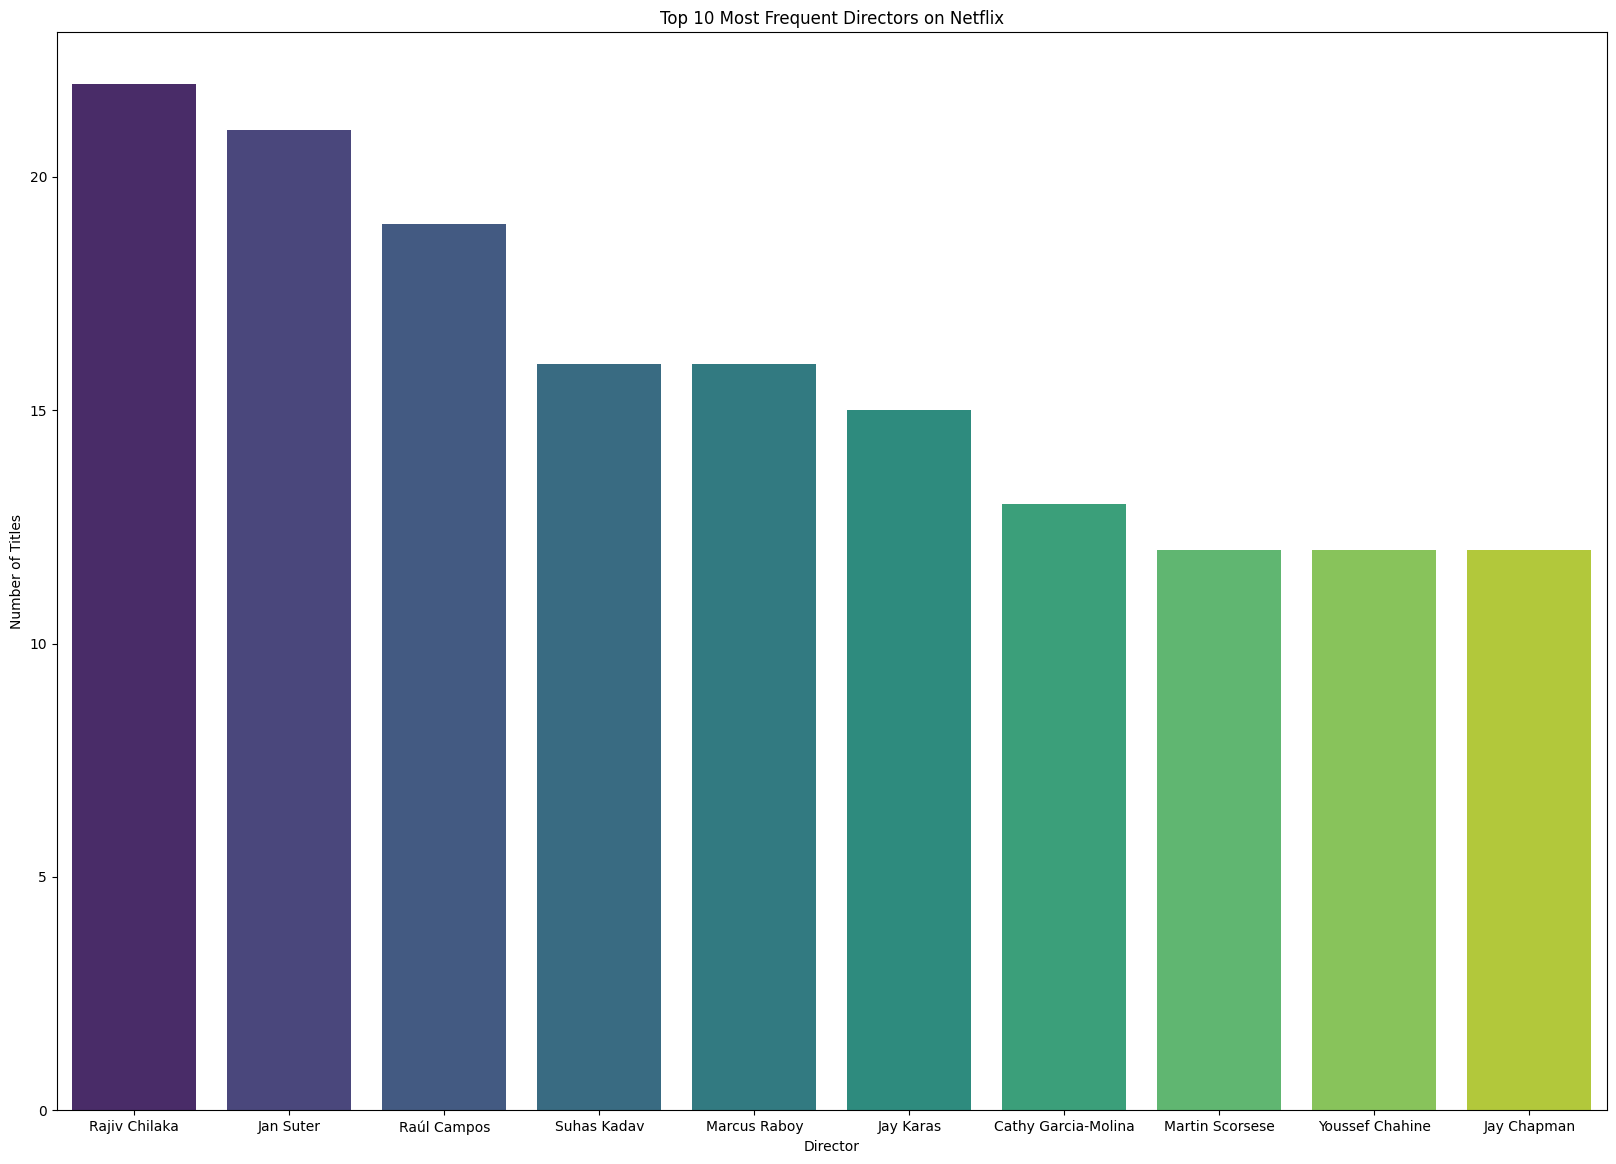

In [214]:
top_directors = netflix_df_dir['director'].value_counts().head(10)

plt.figure(figsize=(20, 14))
sns.barplot(x=top_directors.index, y=top_directors.values, hue=top_directors.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xlabel('Director')
plt.show()

<u>**Observations**</u>

1. The directors listed seem to have contributed 12 to 22 titles, showing moderate production frequency.

2. This suggests that Netflix platform often works repeatedly with a select group of directors, possibly for genre-specific or regional content.

<u>**Top 10 Most Productive Actors**</u>

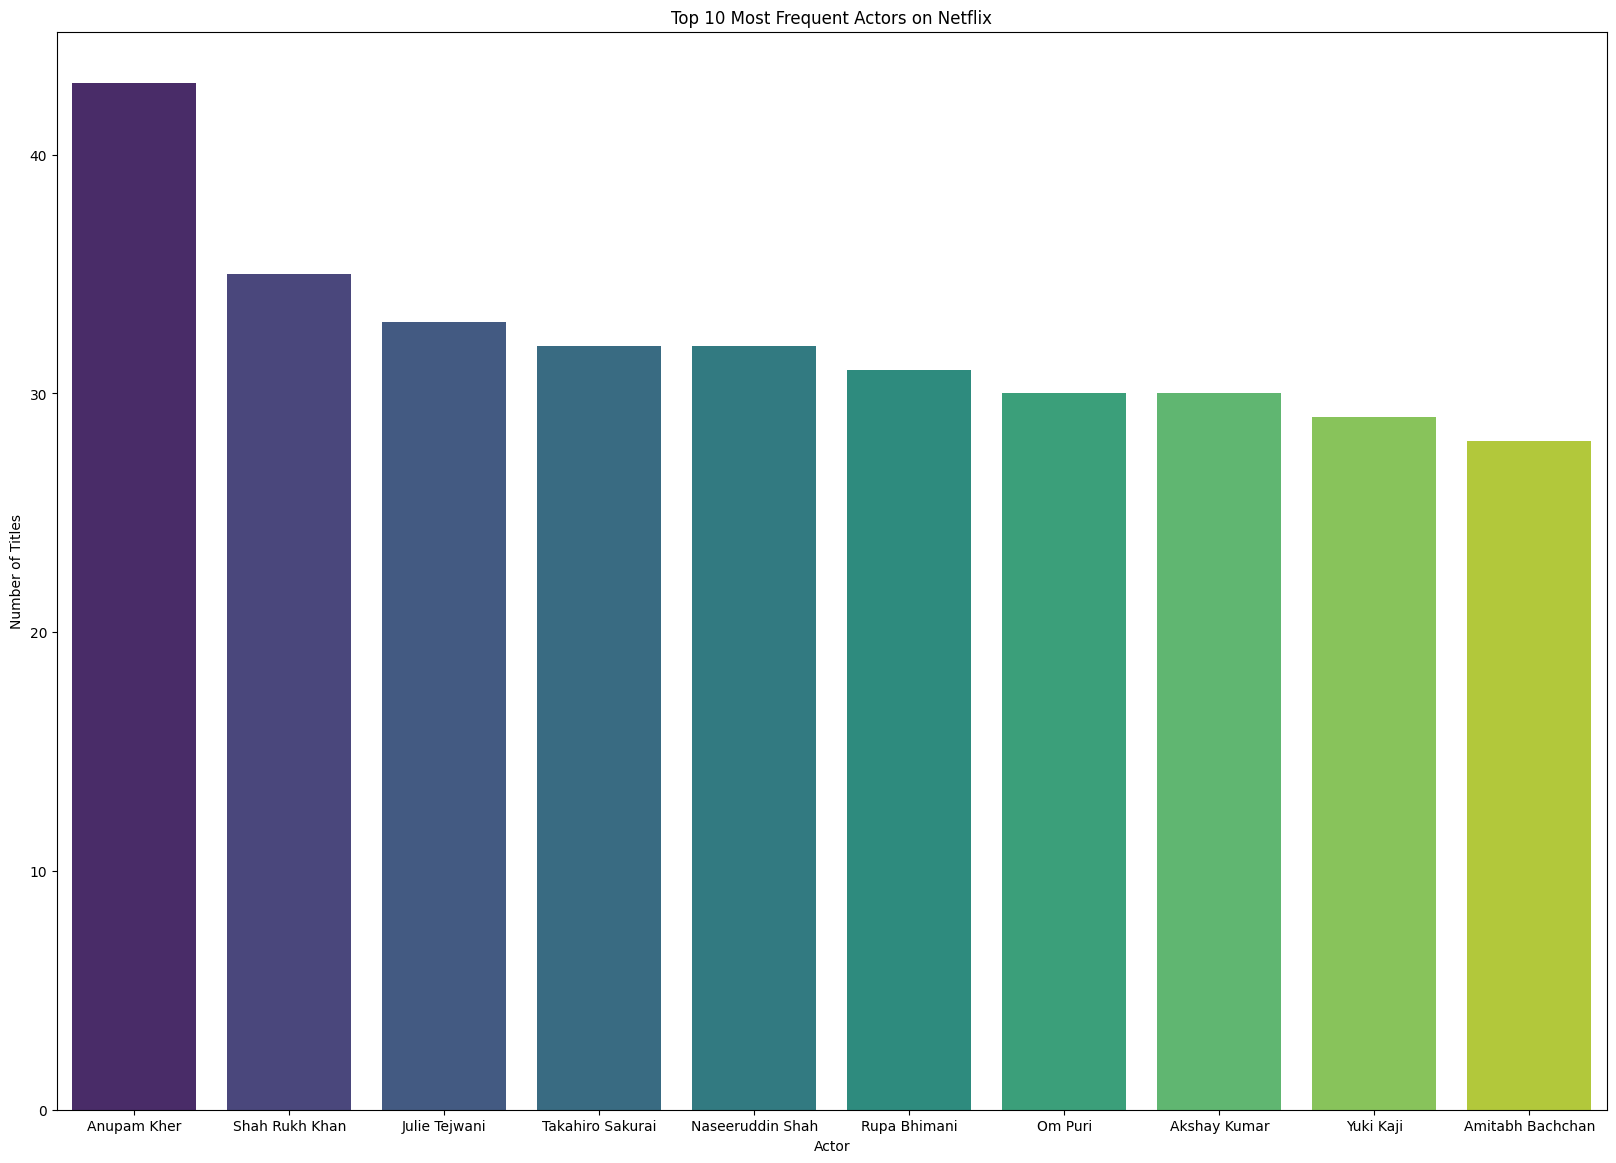

In [215]:
top_casts = netflix_df_cast['cast'].value_counts().head(10)

plt.figure(figsize=(20, 14))
sns.barplot(x=top_casts.index, y=top_casts.values, hue=top_casts.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.ylabel('Number of Titles')
plt.xlabel('Actor')
plt.show()

1. A significant number of actors in the top 10 are from Indian cinema—including Shah Rukh Khan, Naseeruddin Shah, Om Puri, Akshay Kumar, and Amitabh Bachchan.

2. The number of titles per actor is relatively close for ranks 2 to 10, ranging roughly between 28 to 35 titles and most of the actors are Indians.

3. This suggests  a strong inclination toward Indian content.

<Figure size 1000x600 with 0 Axes>

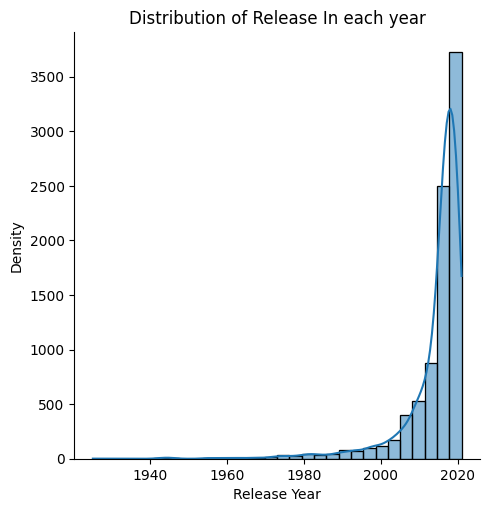

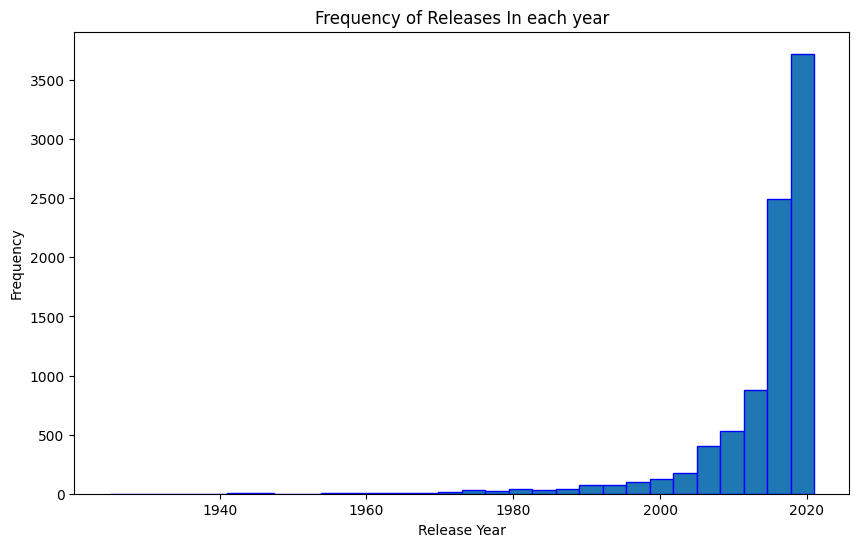

In [216]:
plt.figure(figsize=(10, 6))
sns.displot(netflix_df['release_year'], kde=True, bins=30)
plt.title('Distribution of Release In each year')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(netflix_df['release_year'], bins=30, edgecolor='blue')
plt.title('Frequency of Releases In each year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

<u>**Observations:**</u>
1. The distribution of release years is right-skewed, indicating that most of the content in the platform is relatively new, with a significant amount released in the last 4 years.

<u>**Box Plot for Release Year**</u>

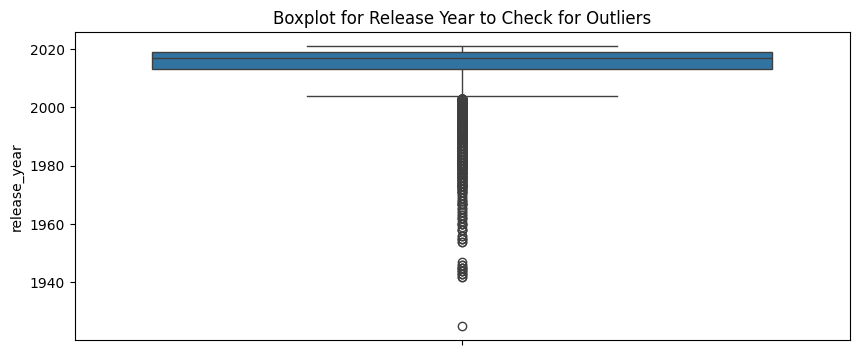

In [217]:
plt.figure(figsize=(10, 4))
sns.boxplot(y=netflix_df['release_year'])
plt.title('Boxplot for Release Year to Check for Outliers')
plt.show()

<u>**Observation**</u>

1. The release_year shows that most of the content on platform Netflix has been released after the year 2000, with a dense clustering around recent years (close to 2020). There are several outliers, especially older content released before 1980, with a few extreme outliers even before 1950. This suggests Netflix library is predominantly modern but does include some classic or archival content.

<u>**Bivariate analysis**</u>

**Relationship Between Type and Rating**

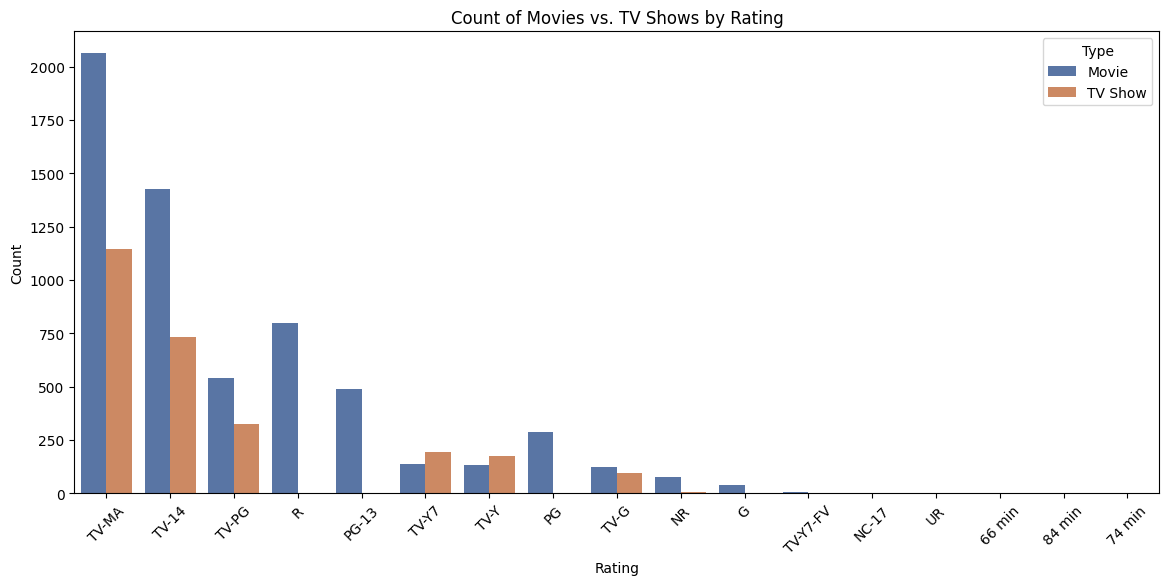

In [218]:
plt.figure(figsize=(14, 6))
sns.countplot(x='rating', hue='type', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='deep')
plt.title('Count of Movies vs. TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

<u>**Observations:**</u>

1. Both Movies and TV Shows predominantly fall under the **TV-MA **and **TV-14** ratings.
2. The distribution of ratings between **Movies** and **TV Shows** is somewhat similar, though Movies have a higher count in most rating categories.

Relationship Between Rating and Release Year

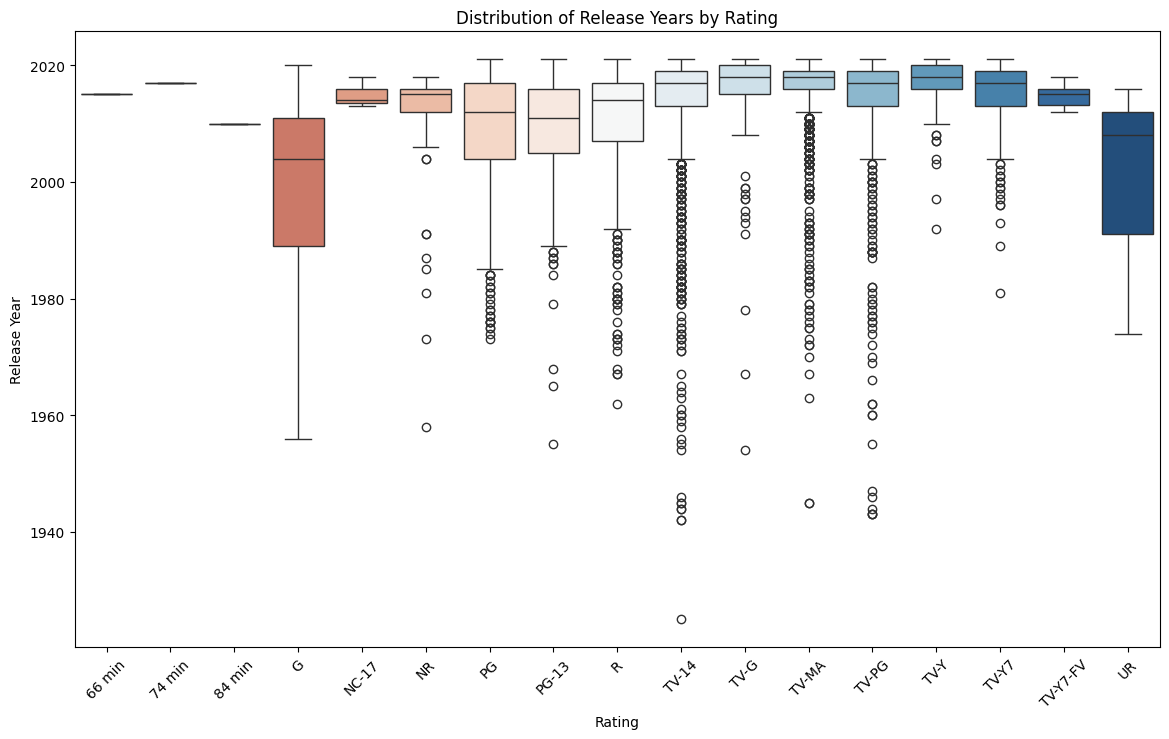

In [219]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='release_year', data=netflix_df, palette='RdBu',hue='rating',legend=False)
plt.title('Distribution of Release Years by Rating')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.xticks(rotation=45)
plt.show()

<u>**Observations:**</u>

1. TV-MA, TV-14, TV-PG, and PG-13 have broad distributions, indicating these ratings span a wide range of years, often with many titles.

2. G, PG, and R rated content also span decades, but G shows older median values with significant outliers.

3. Some ratings (e.g., 66 min, 74 min, 84 min) seem misclassified—these are likely duration values mistakenly included as ratings.

4. The presence of outliers (circles) reflects a few very old titles across several rating groups.

**Relationship Between Type and Release Year**

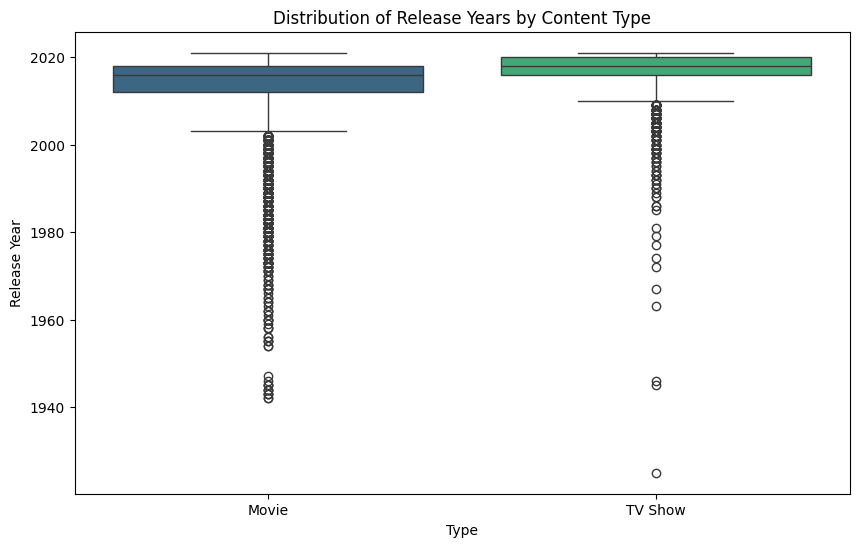

In [220]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=netflix_df, palette='viridis',hue='type',legend=False)
plt.title('Distribution of Release Years by Content Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

<u>**Observations**</u>

1. Both Movies and TV Shows on Netflix mostly span from the early 2000s to just past 2020.

2. The interquartile range (IQR) for both content types is tightly grouped between approximately 2010 and 2020, showing Netflix has a strong focus on recent releases.
3. There are multiple older titles considered outliers — especially movies dating back to the 1940s and TV shows as early as the 1920s, which are rare in the dataset.

4. The median release year for TV shows appears to be slightly more recent than that of movies, suggesting a growing investment in newer serialized content.

<u>**Heatmaps and Pairplots**:</u>

<Figure size 1000x600 with 0 Axes>

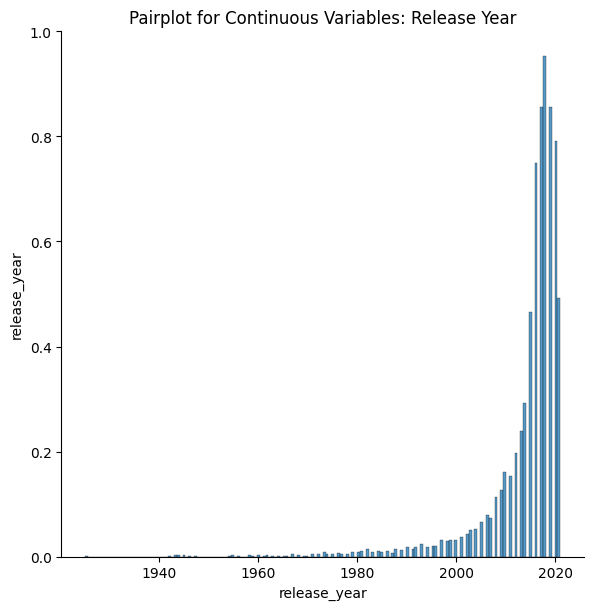

In [221]:
plt.figure(figsize=(10, 6))
sns.pairplot(netflix_df[['release_year']], kind='scatter', height=6)
plt.title('Pairplot for Continuous Variables: Release Year')
plt.show()

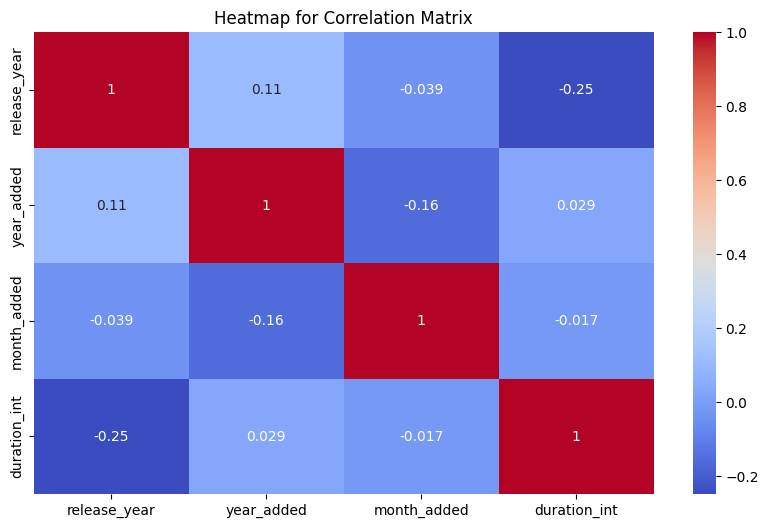

In [222]:
correlation_matrix = netflix_df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Matrix')
plt.show()

<u>**Observations:**</u>

1. Correlations are generally weak, indicating that these variables are mostly independent of each other.

2. release_year and year_added have a mild positive correlation (0.11), suggesting recently released content is added faster, but not strongly so.


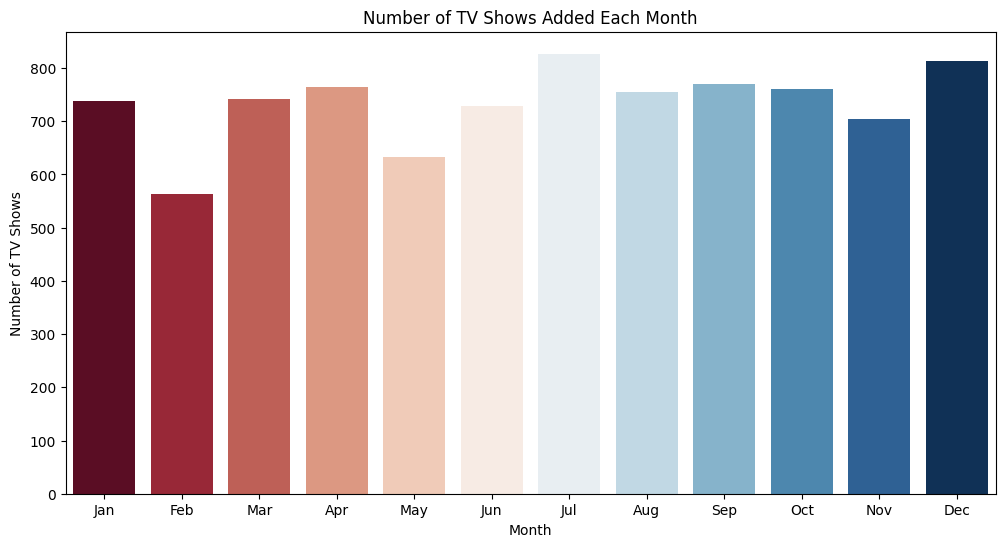

In [223]:
monthly_additions = netflix_df['month_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='RdBu',hue=monthly_additions.index,legend=False)
plt.title('Number of TV Shows Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<u>**Observations**</u>

1. Most shows are added in December and July, followed by September and October.

2. February has the fewest additions, likely due to fewer days.

3. There is s a general rise in additions mid-year and year-end, possibly aligning with Netflix’s content release strategy or holiday periods.

<u>**Business Backed with Data**</u>


1. Wide Range of Content
Insight: Netflix has content from 748 different countries. The U.S., India, and the U.K. are the top contributors.

What This Means: Netflix is great at offering shows and movies for people around the world. This helps them grow in many countries.

2. Focus on Newer Content
Insight: Over a third of all titles are from **2017 to 2019**. TV Shows are generally newer than Movies.

What This Means: Netflix likes to keep its content fresh, which is important to keep viewers interested.

3. Mostly for Teens and Adults
Insight: Most content is rated **TV-MA and TV-14** (about 61% combined).

What This Means: Netflix mainly targets mature teens and adults with its shows.

<u>**Recommendations**</u>

1. Add More Old TV Shows
Why: Most shows are new. Only around 10% are from before 2000.

Suggestion: Adding classic TV shows could attract older viewers.

2. Customize Content by Region
Why: Half the content is from just 3 countries.

Suggestion: Netflix could offer more popular content in each region to gain more local users.

3. Try New Genres and Ratings
Why: Documentaries and Kids’ Movies are less common.

Suggestion: Adding more of these can help Netflix appeal to families and younger audiences.

4. Release Big Shows in December and January
Why: These months have the most new TV show releases.

Suggestion: Launching popular series during these months can boost viewership.